# Lab #12: Texture Based Descriptor - Summary Notes

# Objective:
# Understand texture-based descriptors and their application in image analysis.

# Theory:
# 1. Statistical features from image histograms such as skewness, entropy, and uniformity
#    can describe and differentiate images.
#
# 2. Grey Level Co-occurrence Matrix (GLCM):
#    - Represents how often pairs of gray levels occur at a defined spatial relationship.
#    - Changes in distance/angle affect the GLCM.
#    - Useful parameters: contrast, dissimilarity, homogeneity, energy (uniformity), correlation, ASM.
#
# 3. Frequency Spectral Analysis:
#    - Detects directionality and periodic patterns in textures via Fourier Transform.
#    - Prominent peaks indicate principal direction and frequency (scale) of texture.
#    - Spectrum represented in polar coordinates: S(r, θ)
#      * S_q(r): scale of repetition for fixed direction θ
#      * S_r(θ): orientation for fixed frequency r
#    - Measures dominant directions and scales of texture patterns.

# Useful Python commands (using skimage):
# ---------------------------------------------------------
# Import required package
from skimage.feature import greycomatrix, greycoprops
import numpy as np

# 1. Compute GLCM:
# my_GLCM = greycomatrix(image, distances=[d], angles=[theta], levels=levels, symmetric=False, normed=False)

# 2. Compute GLCM properties:
# contrast = greycoprops(my_GLCM, prop='contrast')
# dissimilarity = greycoprops(my_GLCM, prop='dissimilarity')
# homogeneity = greycoprops(my_GLCM, prop='homogeneity')
# energy = greycoprops(my_GLCM, prop='energy')  # same as uniformity
# correlation = greycoprops(my_GLCM, prop='correlation')
# ASM = greycoprops(my_GLCM, prop='ASM')

# Lab Tasks:
# 1. Compute histograms of images, then extract:
#    - Skewness
#    - Uniformity
#    - Average Entropy
#
# 2. Calculate GLCM for given images:
#    - Display GLCMs as images
#    - Calculate and compare GLCM parameters
#    - Calculate uniformity and entropy using built-in functions
#
# 3. Perform spectral analysis to extract and plot feature profiles S(r) and S(θ):
#    - For different r (frequency) and θ (angle) values.

# Note: scikit-image package may need manual installation if pip fails.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2
from math import log2
from skimage.feature import graycomatrix, graycoprops

Image 1
 5.699390923766922 7.769577206257486e-10 0.02277108468754661
Image 2
 6.784599912909418 5.498987295848999e-09 0.012121540730102884
Image 3
 7.2041254613026915 6.022415735960032e-08 0.007810064776638584


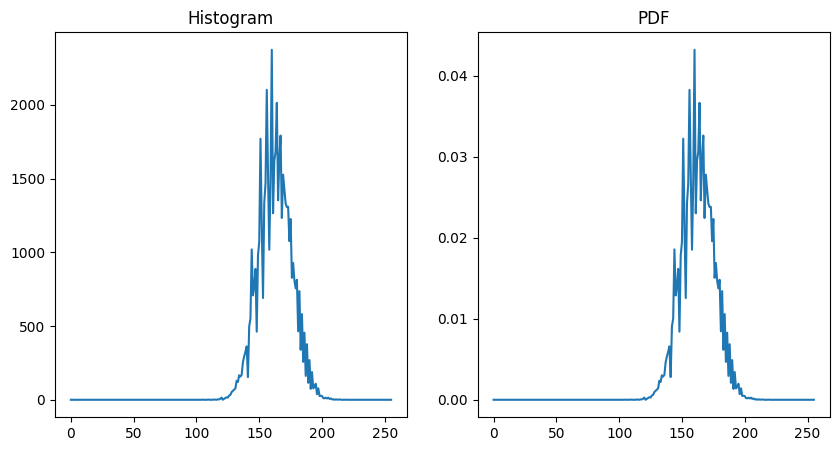

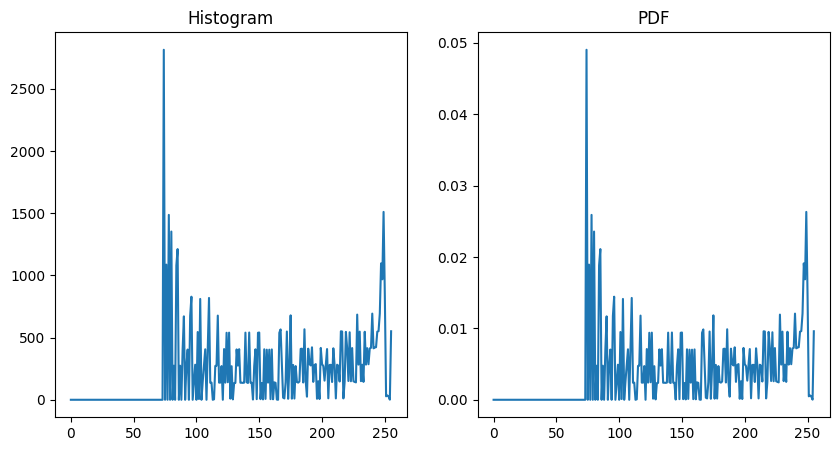

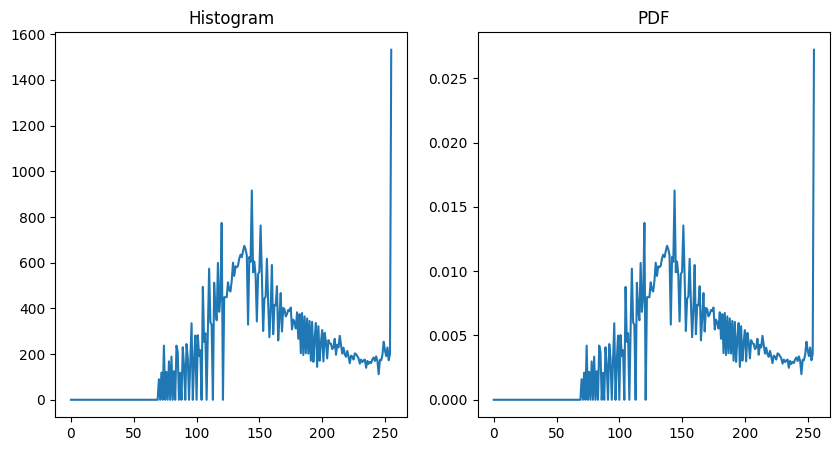

In [2]:
def histogram(img):
    array = [0] * 256
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel_val = int(img[i, j])
            array[pixel_val] += 1
    array = np.array(array)
    return array

def pdf(hist, row,col):
    pdf = (hist)/(row*col)
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    axes[0].plot(hist)
    axes[0].set_title("Histogram")
    axes[1].plot(pdf)
    axes[1].set_title("PDF")
    return pdf

def features(hist_, pdf_):
    skewness= sigma = 0
    mean_ = np.mean(hist_)
    for i in range(len(hist_)):
        sigma = sigma + ((hist_[i] - mean_)**2)*pdf_[i]
    for i in range(len(hist_)):
        skewness = skewness + ((hist_[i] - mean_)**3)*pdf_[i]/sigma**3

    uniformity = 0
    for i in range(len(pdf_)):
        uniformity = uniformity + pdf_[i]**2
    entropy = 0
    for i in range(len(pdf_)):
        if pdf_[i] > 0:
            entropy += pdf_[i] * log2(pdf_[i])
    entropy = -entropy  # Entropy is negative sum

    return entropy, skewness, uniformity

img1 = cv2.imread('image1.png', 0)
img2 = cv2.imread('image2.png', 0)
img3 = cv2.imread('image3.png', 0)

hist1 = histogram(img1)
hist2 = histogram(img2)
hist3 = histogram(img3)

pdf1 = pdf(hist1, img1.shape[0], img1.shape[1])
pdf2 = pdf(hist2, img2.shape[0], img2.shape[1])
pdf3 = pdf(hist3, img3.shape[0], img3.shape[1])

en1, skew1, uniformity1 = features(hist1, pdf1)
en2, skew2, uniformity2 = features(hist2, pdf2)
en3, skew3, uniformity3 = features(hist3, pdf3)

print("Image 1\n", en1, skew1, uniformity1)
print("Image 2\n", en2, skew2, uniformity2)
print("Image 3\n", en3, skew3, uniformity3)


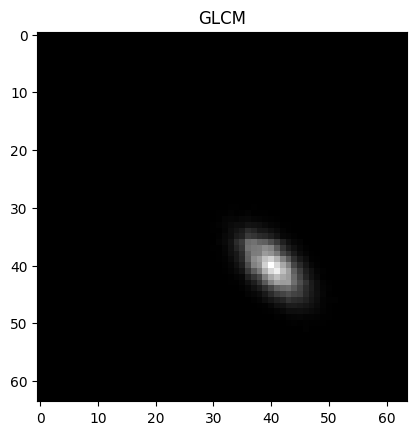

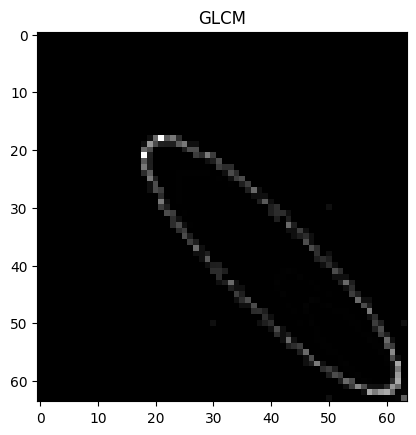

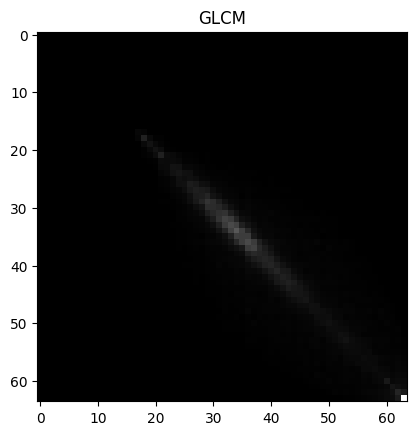

Image 1
 7.202637457818815 0.02752143530321507 0.009231505190460577
Image 2
 7.622216916253642 -0.024044159080834973 0.006637335306782428
Image 3
 9.272885315206373 0.3933734621012093 0.0032759951926196705


In [3]:
def plot_glcm(glcm):
    glcm_img = glcm[:, :, 0, 0]
    plt.imshow(glcm_img, cmap='gray')
    plt.title("GLCM")
    plt.show()

def glcm_feature(img):
    img = (img / 4).astype(np.uint8)
    glcm = graycomatrix(img, [1], [0], levels=64, symmetric=True, normed=True)
    plot_glcm(glcm)

    glcm_2d = glcm[:, :, 0, 0]
    pdf_ = glcm_2d.flatten()

    entropy = 0
    for i in range(len(pdf_)):
        if pdf_[i] > 0:
            entropy += pdf_[i] * log2(pdf_[i])
    entropy = -entropy
    indices = np.arange(len(pdf_))
    mean_ = np.sum(indices * pdf_)
    sigma = np.sqrt(np.sum((indices - mean_)**2 * pdf_))
    skewness = np.sum(((indices - mean_)**3) * pdf_) / (sigma**3)

    uniformity = np.sum(pdf_**2)

    return entropy, skewness, uniformity, glcm_2d
img1 = cv2.imread('image1.png', 0)
img2 = cv2.imread('image2.png', 0)
img3 = cv2.imread('image3.png', 0)

en1, skew1, uniformity1, glcm_prob1 = glcm_feature(img1)
en2, skew2, uniformity2, glcm_prob2 = glcm_feature(img2)
en3, skew3, uniformity3, glcm_prob3 = glcm_feature(img3)
print("Image 1\n", en1, skew1, uniformity1)
print("Image 2\n", en2, skew2, uniformity2)
print("Image 3\n", en3, skew3, uniformity3)


209
205
201
197
193
189
185
181
177
173
169
165
161
157
153
149
145
141
137
133
129
125
121
117
113
109
105
101
97
93
89
85
81
77
73
69
65
61
57
53
49
45
41
37
33
29
25
21
17
13
9


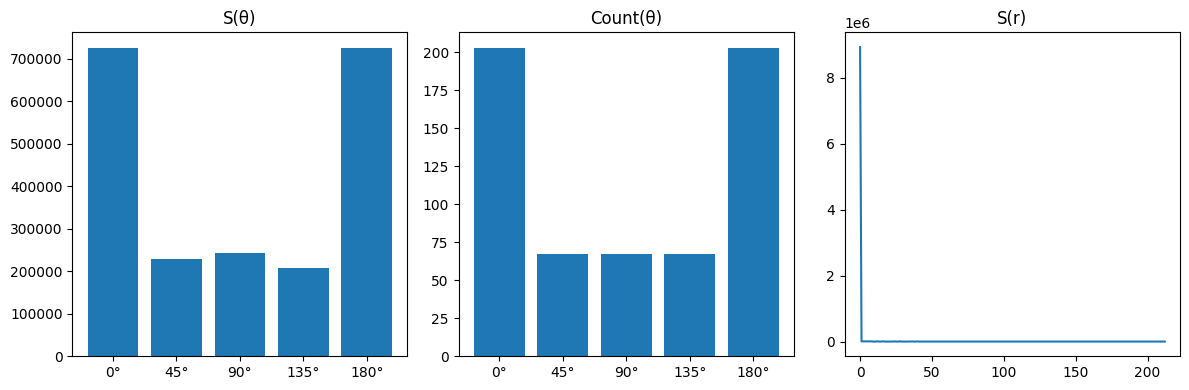

213
209
205
201
197
193
189
185
181
177
173
169
165
161
157
153
149
145
141
137
133
129
125
121
117
113
109
105
101
97
93
89
85
81
77
73
69
65
61
57
53
49
45
41
37
33
29
25
21
17
13
9


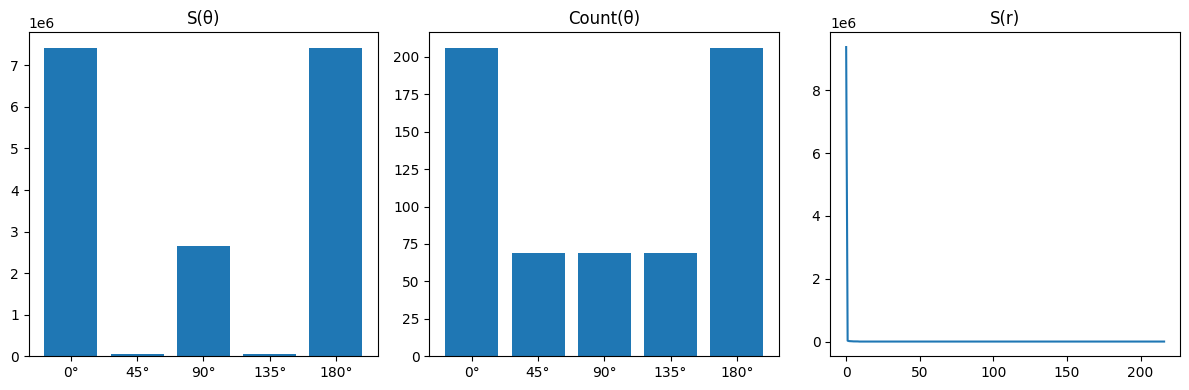

211
207
203
199
195
191
187
183
179
175
171
167
163
159
155
151
147
143
139
135
131
127
123
119
115
111
107
103
99
95
91
87
83
79
75
71
67
63
59
55
51
47
43
39
35
31
27
23
19
15
11
7


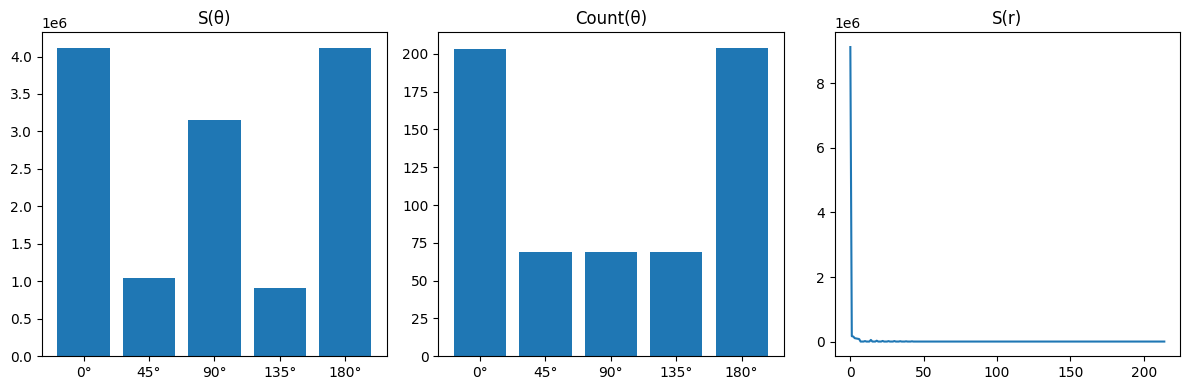

In [4]:
def spectral_features(img):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude = np.abs(fshift)

    row, col = img.shape
    cx, cy = row // 2, col // 2

    count0 = count45 = count90 = count135 = count180 =  0
    s0 = s45 = s90 = s135 = s180 = 0


    max_radius = int(np.hypot(cx, cy))
    s_r = np.zeros(max_radius)
    count_r = np.zeros(max_radius)

    for i in range(row):
        for j in range(col):
            dx = i - cx
            dy = j - cy
            r = int(np.hypot(dx, dy))

            if r < max_radius:
                s_r[r] += magnitude[i, j]
                count_r[r] += 1
                if max_radius > 10:
                    max_radius -=4
                    print(max_radius)
            if dx == 0 and dy == 0:
                continue

            if dx == 0 and dy > 0:
                s0 += magnitude[i, j]
                count0 += 1
            elif dx == -dy and dx < 0:
                s45 += magnitude[i, j]
                count45 += 1
            elif dy == 0 and dx < 0:
                s90 += magnitude[i, j]
                count90 += 1
            elif dx == dy and dx < 0:
                s135 += magnitude[i, j]
                count135 += 1
            elif dx == 0 and dy < 0:
                s180 += magnitude[i, j]
                count180 += 1

    angles = ['0°', '45°', '90°', '135°', '180°']
    s_values = [s0, s45, s90, s135, s180]
    count_values = [count0, count45, count90, count135, count180]


    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    plt.bar(angles, s_values)
    plt.title("S(θ)")

    plt.subplot(1, 3, 2)
    plt.bar(angles, count_values)
    plt.title("Count(θ)")

    avg_s_r = np.divide(s_r, count_r, out=np.zeros_like(s_r), where=count_r != 0)
    plt.subplot(1, 3, 3)
    plt.plot(avg_s_r)
    plt.title("S(r)")


    plt.tight_layout()
    plt.show()


spectral_features(img1)
spectral_features(img2)
spectral_features(img3)
